Confusion Matrix:
 [[9 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



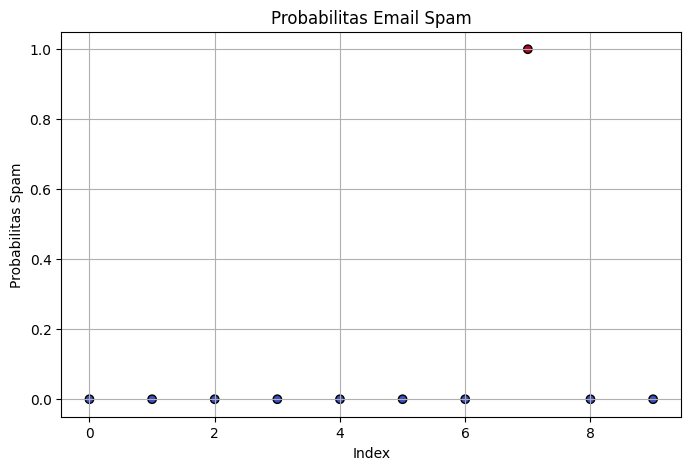

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Buat 50 data secara manual
data = {
    'capital_words': [
        3, 10, 2, 5, 1, 15, 0, 8, 6, 2,
        7, 14, 0, 11, 4, 5, 13, 9, 3, 2,
        4, 10, 7, 6, 0, 15, 3, 12, 2, 5,
        6, 11, 3, 7, 9, 2, 4, 13, 6, 5,
        12, 7, 8, 4, 1, 10, 5, 11, 3, 6
    ],
    'exclamations': [
        1, 4, 0, 2, 1, 6, 0, 3, 2, 1,
        2, 5, 0, 4, 1, 2, 5, 3, 1, 0,
        1, 3, 2, 2, 0, 6, 1, 4, 0, 2,
        2, 4, 1, 2, 3, 0, 1, 5, 2, 2,
        4, 2, 3, 1, 0, 3, 1, 4, 1, 2
    ],
    'email_length': [
        100, 300, 120, 250, 80, 400, 60, 270, 210, 90,
        220, 360, 70, 320, 130, 200, 350, 280, 100, 110,
        190, 310, 230, 210, 50, 420, 140, 330, 120, 200,
        210, 300, 110, 240, 260, 100, 180, 370, 200, 190,
        340, 230, 250, 160, 80, 310, 190, 340, 150, 220
    ],
    'contains_promo': [
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 0
    ]
}

# Label spam berdasarkan aturan sederhana
df = pd.DataFrame(data)
df['spam'] = ((df['capital_words'] + df['exclamations'] + 3 * df['contains_promo']) > 20).astype(int)

# Split data
X = df.drop('spam', axis=1)
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualisasi probabilitas
probs = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 5))
plt.scatter(range(len(probs)), probs, c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Probabilitas Email Spam")
plt.xlabel("Index")
plt.ylabel("Probabilitas Spam")
plt.grid(True)
plt.show()
